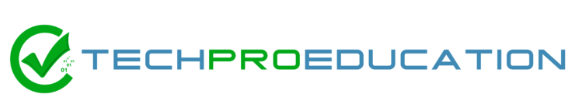

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("kc_house_data.csv")

## Exploratory Data Analysis and Visualization

The "kc_house_data" dataset contains data on home sales that took place in Seattle, Washington, in 2014. The exact time of data collection is not specified, but the dataset description states that the home sales occurred between May 2014 and May 2015.

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503


We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df.isnull().sum().any()

False

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21597.000,4580474287.771,2876735715.748,1000102.000,2123049175.000,3904930410.000,7308900490.000,9900000190.000
price,21597.000,540296.574,367368.140,78000.000,322000.000,450000.000,645000.000,7700000.000
bedrooms,21597.000,3.373,0.926,1.000,3.000,3.000,4.000,33.000
bathrooms,21597.000,2.116,0.769,0.500,1.750,2.250,2.500,8.000
sqft_living,21597.000,2080.322,918.106,370.000,1430.000,1910.000,2550.000,13540.000
sqft_lot,21597.000,15099.409,41412.637,520.000,5040.000,7618.000,10685.000,1651359.000
floors,21597.000,1.494,0.540,1.000,1.000,1.500,2.000,3.500
waterfront,21597.000,0.008,0.087,0.000,0.000,0.000,0.000,1.000
view,21597.000,0.234,0.766,0.000,0.000,0.000,0.000,4.000
condition,21597.000,3.410,0.651,1.000,3.000,3.000,4.000,5.000


### İd_number

In [7]:
df = df.drop('id', axis = 1)

### price

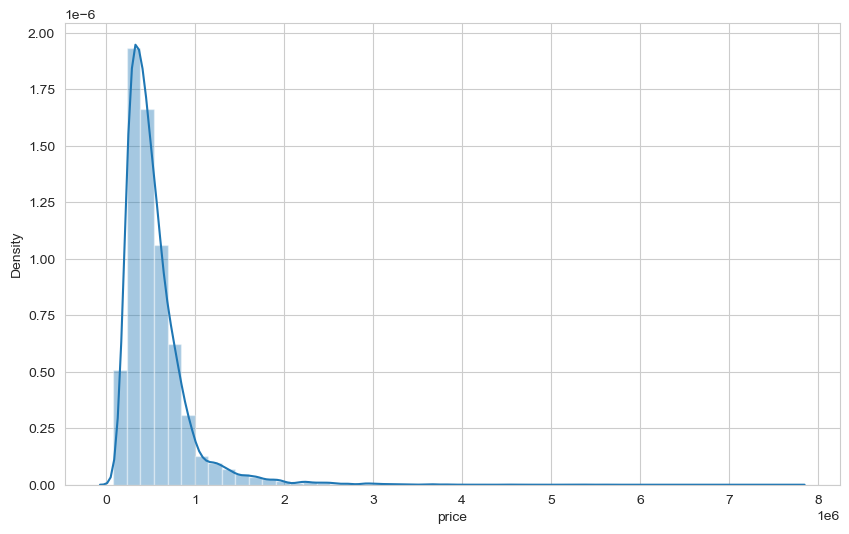

In [8]:
sns.distplot(df['price']);

In [9]:
# Let's examine the outlier situation feature-wise
df[df["price"] > 3000000].sort_values(by="price", ascending=False)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,10/13/2014,7700000.000,6,8.000,12050,27600,2.500,0,3,4,13,8570,3480,1910,1987,98102,47.630,-122.323,3940,8800
3910,6/11/2014,7060000.000,5,4.500,10040,37325,2.000,1,2,3,11,7680,2360,1940,2001,98004,47.650,-122.214,3930,25449
9245,9/19/2014,6890000.000,6,7.750,9890,31374,2.000,0,4,3,13,8860,1030,2001,0,98039,47.630,-122.240,4540,42730
4407,8/4/2014,5570000.000,5,5.750,9200,35069,2.000,0,0,3,13,6200,3000,2001,0,98039,47.629,-122.233,3560,24345
1446,4/13/2015,5350000.000,5,5.000,8000,23985,2.000,0,4,3,12,6720,1280,2009,0,98004,47.623,-122.220,4600,21750
1313,4/13/2015,5300000.000,6,6.000,7390,24829,2.000,1,4,4,12,5000,2390,1991,0,98040,47.563,-122.210,4320,24619
1162,10/20/2014,5110000.000,5,5.250,8010,45517,2.000,1,4,3,12,5990,2020,1999,0,98033,47.677,-122.211,3430,26788
8085,6/17/2014,4670000.000,5,6.750,9640,13068,1.000,1,4,3,12,4820,4820,1983,2009,98040,47.557,-122.210,3270,10454
2624,8/15/2014,4500000.000,5,5.500,6640,40014,2.000,1,4,3,12,6350,290,2004,0,98155,47.749,-122.280,3030,23408
8629,6/18/2014,4490000.000,4,3.000,6430,27517,2.000,0,0,3,12,6430,0,2001,0,98004,47.621,-122.219,3720,14592


This code snippet is used to examine the correlations between the columns within a dataframe called "df" and to visualize the relationship of the "price" column with other columns.

In [10]:
 df['date'] = pd.to_datetime(df['date'])   # convert the data type of date column from object to datetime to not get any error in corr

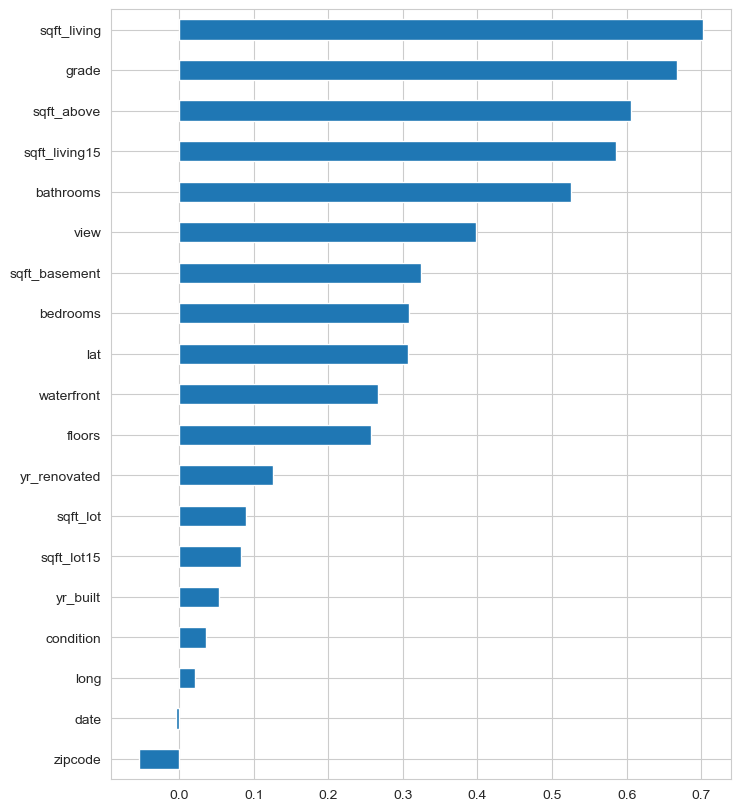

In [11]:
plt.figure(figsize = (8,10))
df.corr()["price"].sort_values().drop("price").plot(kind = "barh");

### sqft_living

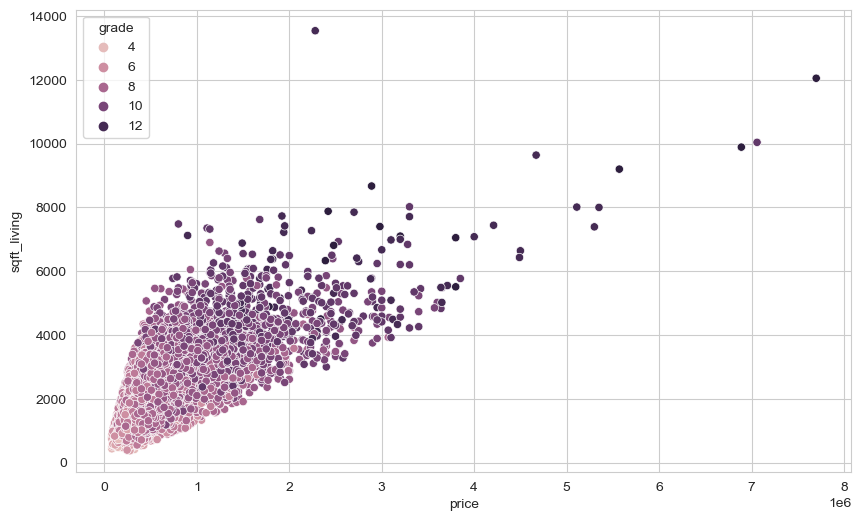

In [12]:
sns.scatterplot(x = "price", y = "sqft_living", data = df, hue = "grade");

### bedrooms and floors

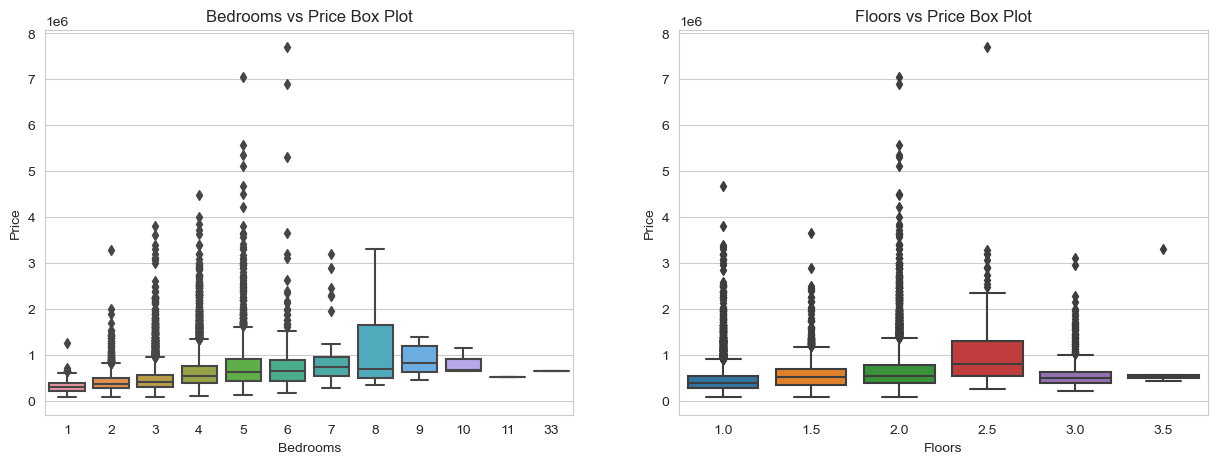

In [13]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

sns.boxplot(x=df['bedrooms'],y=df['price'], ax=axes[0])
sns.boxplot(x=df['floors'],y=df['price'], ax=axes[1])

axes[0].set(xlabel='Bedrooms', ylabel='Price', title='Bedrooms vs Price Box Plot')
axes[1].set(xlabel='Floors', ylabel='Price', title='Floors vs Price Box Plot')
plt.show()

In [14]:
df[df["bedrooms"] > 10]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8748,2014-08-21,520000.000,11,3.000,3000,4960,2.000,0,0,3,7,2400,600,1918,1999,98106,47.556,-122.363,1420,4960
15856,2014-06-25,640000.000,33,1.750,1620,6000,1.000,0,0,5,7,1040,580,1947,0,98103,47.688,-122.331,1330,4700


In [15]:
df = df[df["bedrooms"] != 33]       # 15856. satırı bu şekilde verimizden çıkartabiliriz

In [16]:
df.shape

(21596, 20)

In [17]:
df[df["floors"] == 3.50]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
10066,2014-08-01,435000.000,3,3.000,1440,1350,3.500,0,2,3,8,1440,0,2005,0,98103,47.653,-122.345,1440,1350
11582,2015-01-30,544000.000,3,2.500,1760,1755,3.500,0,0,3,8,1760,0,1998,0,98105,47.669,-122.279,1700,1721
14871,2015-04-02,525000.000,3,3.000,1730,1074,3.500,0,0,3,8,1730,0,2006,0,98107,47.669,-122.392,1370,1185
15410,2015-04-16,479000.000,2,2.500,1730,1037,3.500,0,0,3,8,1730,0,2008,0,98118,47.559,-122.285,1280,1026
18462,2014-10-20,3300000.000,8,4.000,7710,11750,3.500,0,0,5,12,6090,1620,1904,0,98112,47.626,-122.314,4210,8325
20292,2014-09-18,525000.000,2,2.750,1310,1268,3.500,0,0,3,8,1310,0,2007,0,98103,47.653,-122.355,1350,1288
20756,2014-06-25,563500.000,3,2.500,1400,1312,3.500,0,0,3,8,1400,0,2007,0,98103,47.653,-122.355,1350,1312


### date

In [18]:
df['date'].dtype

dtype('<M8[ns]')

In [19]:
df['date'] = pd.to_datetime(df['date'])

This code line is used to convert the date data in the "date" column to the datetime data type using the pd.to_datetime() function from the pandas library. While date data is typically stored as text or numeric data types, the datetime data type is used to represent date and time information more effectively.

In [20]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21596, dtype: datetime64[ns]

In [21]:
df['year'] = df['date'].dt.year

df['month'] = df['date'].dt.month

This code line is used to extract the year and month information from the date data in the "date" column and create new columns named "year" and "month." This way, the year and month information will be stored in separate columns for each data point.

In [22]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650,2014,10
1,2014-12-09,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639,2014,12
2,2015-02-25,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,98028,47.738,-122.233,2720,8062,2015,2
3,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000,2014,12
4,2015-02-18,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503,2015,2


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21596 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21596 non-null  datetime64[ns]
 1   price          21596 non-null  float64       
 2   bedrooms       21596 non-null  int64         
 3   bathrooms      21596 non-null  float64       
 4   sqft_living    21596 non-null  int64         
 5   sqft_lot       21596 non-null  int64         
 6   floors         21596 non-null  float64       
 7   waterfront     21596 non-null  int64         
 8   view           21596 non-null  int64         
 9   condition      21596 non-null  int64         
 10  grade          21596 non-null  int64         
 11  sqft_above     21596 non-null  int64         
 12  sqft_basement  21596 non-null  int64         
 13  yr_built       21596 non-null  int64         
 14  yr_renovated   21596 non-null  int64         
 15  zipcode        21596 non

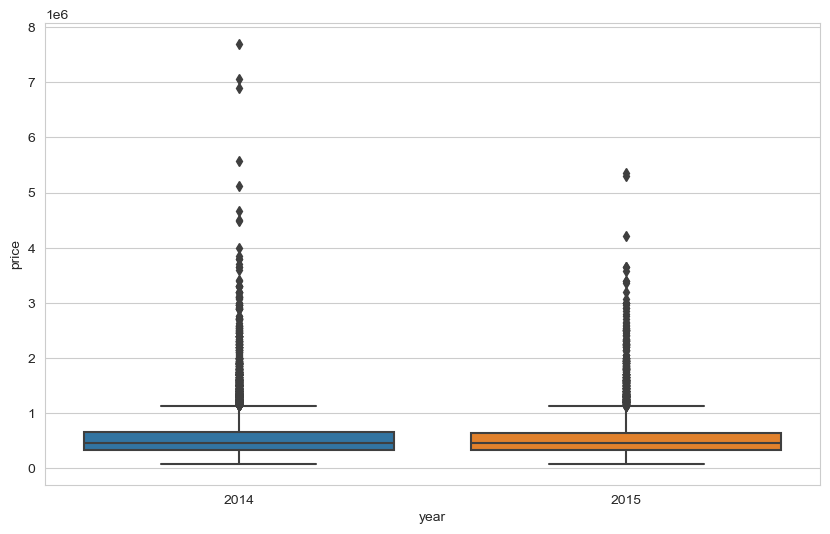

In [24]:
sns.boxplot(x = "year", y = "price", data = df);

In [25]:
month_dummy = pd.get_dummies(df["month"], prefix = "month")
df = pd.concat([df, month_dummy], axis = 1)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,2014-10-13,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650,2014,10,False,False,False,False,False,False,False,False,False,True,False,False
1,2014-12-09,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639,2014,12,False,False,False,False,False,False,False,False,False,False,False,True
2,2015-02-25,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,98028,47.738,-122.233,2720,8062,2015,2,False,True,False,False,False,False,False,False,False,False,False,False
3,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000,2014,12,False,False,False,False,False,False,False,False,False,False,False,True
4,2015-02-18,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503,2015,2,False,True,False,False,False,False,False,False,False,False,False,False


These code lines are used to create binary (dummy) variables from the month data in the "month" column and add them to the dataframe. This kind of operation simplifies analysis by making categorical data suitable for modeling.

In [26]:
# We are removing the features that cannot be included in the model
df = df.drop(['date', "year", "month"], axis = 1)

### zipcode

In [27]:
df['zipcode'].value_counts(dropna = False)

zipcode
98103    601
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: count, Length: 70, dtype: int64

This code is aimed at displaying the number of unique zip codes in the "zipcode" column of the dataframe. It allows you to see how many times each zip code is repeated in the dataframe.

The `value_counts()` function is frequently used to understand the data distribution by counting unique values. The `dropna=False` parameter ensures that missing (NaN) values are also included in the count.

In [28]:
# We are removing the zip code as it cannot be used
df = df.drop('zipcode', axis = 1)

### latest data

In [29]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,47.511,-122.257,1340,5650,False,False,False,False,False,False,False,False,False,True,False,False
1,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,47.721,-122.319,1690,7639,False,False,False,False,False,False,False,False,False,False,False,True
2,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,47.738,-122.233,2720,8062,False,True,False,False,False,False,False,False,False,False,False,False
3,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,47.521,-122.393,1360,5000,False,False,False,False,False,False,False,False,False,False,False,True
4,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,47.617,-122.045,1800,7503,False,True,False,False,False,False,False,False,False,False,False,False


In [30]:
df.shape

(21596, 30)

## Preprocessing of Data
- Train | Test Split, Scalling

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X = df.drop('price', axis = 1).values
y = df['price'].values

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [34]:
from sklearn.preprocessing import MinMaxScaler 

In [35]:
scaler = MinMaxScaler()

In [36]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

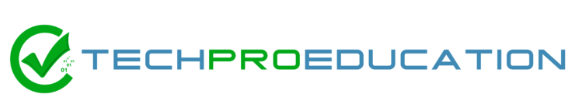

## Modelling & Model Performance

In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

In [39]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [40]:
X_train.shape

(19436, 29)

In [41]:
model = Sequential()

model.add(Dense(32, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1))


model.compile(optimizer = 'adam', loss = 'mse')

**Validation loss (val loss)** and **training loss (loss)** are two different error metrics calculated during model training.

- **Training loss** measures how well the model fits the training data. When the model fits the training data perfectly, the training loss approaches zero. However, even if the training loss is very low, it does not always mean that the model will perform well in real-world scenarios. Therefore, validation loss is calculated to assess the model's performance more accurately.

- **Validation loss** (val loss) measures how well the model generalizes to new data by assessing its performance on a separate validation set, which is not used in training. Since the model may perform worse on unseen data, validation loss is often higher than training loss.

In most cases, training loss is lower than validation loss. However, if the model starts overfitting, the validation loss may increase while the training loss remains low. Monitoring validation loss is crucial during training, as it provides insights into how well the model will perform in real-world situations and helps detect overfitting.

**Validation split** refers to the process of reserving a specific percentage of the dataset as validation data. This percentage typically ranges between 10% and 30%, depending on the size of the dataset and the model being used.

The validation split helps evaluate the model's performance on unseen data during training, providing a more reliable assessment of how the model will perform in real-world applications.

In [42]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 128, epochs = 500)

Epoch 1/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 429949911040.0000 - val_loss: 420557619200.0000
Epoch 2/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 394558177280.0000 - val_loss: 148330446848.0000
Epoch 3/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 114433220608.0000 - val_loss: 103125024768.0000
Epoch 4/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 92887736320.0000 - val_loss: 98791448576.0000
Epoch 5/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 87150657536.0000 - val_loss: 94432911360.0000
Epoch 6/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 88918745088.0000 - val_loss: 90013827072.0000
Epoch 7/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 82169503744.0000 - val_loss: 85402574848.0000
Epoch 8/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 78168817664.0000 - val_loss: 79853191168.0000
Epoch 9/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 73428877312.0000 - val_loss: 74192592896.0000
Epoch 10/500
130/130 ━━━━━━━━━━

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 29690144768.0000 - val_loss: 32286609408.0000
Epoch 116/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 29961816064.0000 - val_loss: 32841416704.0000
Epoch 117/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 28732215296.0000 - val_loss: 31827550208.0000
Epoch 118/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 30762303488.0000 - val_loss: 31765305344.0000
Epoch 119/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 28813381632.0000 - val_loss: 32290234368.0000
Epoch 120/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 29296070656.0000 - val_loss: 31674396672.0000
Epoch 121/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 30056488960.0000 - val_loss: 32073224192.0000
Epoch 122/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 30123413504.0000 - val_loss: 31806117888.0000
Epoch 123/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 29044453376.0000 - val_loss: 32275802112.0000
Epoch 124/500
130/130 ━━━━━━━━━━━

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26429124608.0000 - val_loss: 28975167488.0000
Epoch 230/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24718727168.0000 - val_loss: 29151129600.0000
Epoch 231/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 27181826048.0000 - val_loss: 29259771904.0000
Epoch 232/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 25597728768.0000 - val_loss: 29018030080.0000
Epoch 233/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 26287863808.0000 - val_loss: 29061926912.0000
Epoch 234/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 26716137472.0000 - val_loss: 29398052864.0000
Epoch 235/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 25687564288.0000 - val_loss: 29189505024.0000
Epoch 236/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 25493055488.0000 - val_loss: 30109861888.0000
Epoch 237/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 27172290560.0000 - val_loss: 29038942208.0000
Epoch 238/500
130/130 ━━━━━━━━━━━

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24796645376.0000 - val_loss: 29908815872.0000
Epoch 344/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24650428416.0000 - val_loss: 30087897088.0000
Epoch 345/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24494303232.0000 - val_loss: 29334349824.0000
Epoch 346/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23999655936.0000 - val_loss: 29560735744.0000
Epoch 347/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23614242816.0000 - val_loss: 29759588352.0000
Epoch 348/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 25215651840.0000 - val_loss: 29425205248.0000
Epoch 349/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24507328512.0000 - val_loss: 30146938880.0000
Epoch 350/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 25371398144.0000 - val_loss: 29486581760.0000
Epoch 351/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 25177016320.0000 - val_loss: 29438640128.0000
Epoch 352/500
130/130 ━━━━━━━━━━━

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22954575872.0000 - val_loss: 30111322112.0000
Epoch 458/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23864137728.0000 - val_loss: 29867290624.0000
Epoch 459/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24090245120.0000 - val_loss: 29892413440.0000
Epoch 460/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23775389696.0000 - val_loss: 30587244544.0000
Epoch 461/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23817926656.0000 - val_loss: 29690083328.0000
Epoch 462/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22467377152.0000 - val_loss: 29965449216.0000
Epoch 463/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23953997824.0000 - val_loss: 30080239616.0000
Epoch 464/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23469516800.0000 - val_loss: 30530197504.0000
Epoch 465/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24302548992.0000 - val_loss: 29933156352.0000
Epoch 466/500
130/130 ━━━━━━━━━━━

In [43]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,237 (43.90 KB)

 Trainable params: 3,745 (14.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,492 (29.27 KB)

In [44]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,428204654592.000,420557619200.000
1,339600343040.000,148330446848.000
2,101749022720.000,103125024768.000
3,93488750592.000,98791448576.000
4,89063653376.000,94432911360.000
...,...,...
495,23792060416.000,30204717056.000
496,23819071488.000,29960306688.000
497,23796111360.000,30008154112.000
498,23758241792.000,29795233792.000


<Axes: >

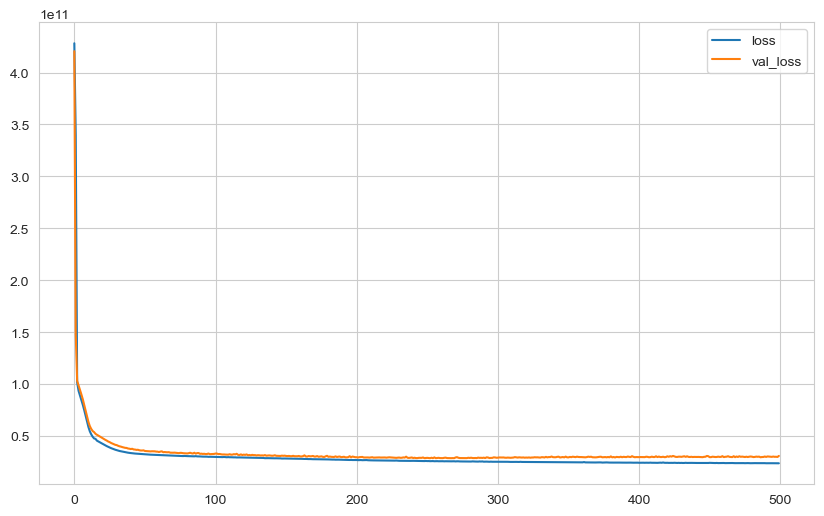

In [45]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [46]:
model.evaluate(X_test, y_test, verbose=0)

23132043264.0

In [47]:
y_pred = model.predict(X_test)

68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [48]:
eval_metric(y_test, y_pred)

r2_score: 0.8199557145726307 
mae: 95378.52749927662 
mse: 23132046929.85182 
rmse: 152092.23165517632


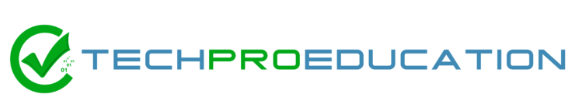

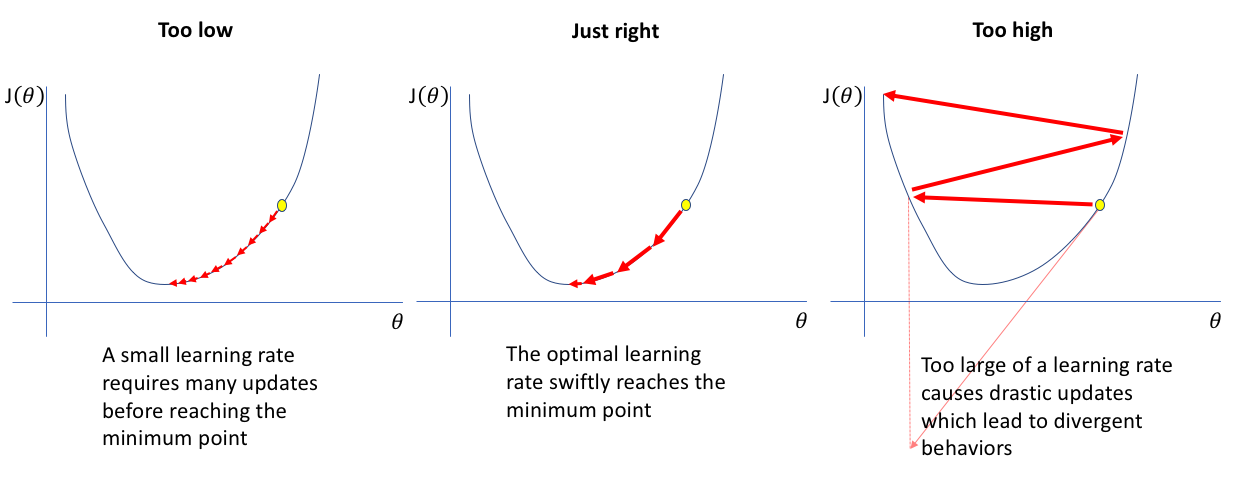

# learning_rate

The **learning rate** is a crucial hyperparameter in the training of deep learning models. It determines how quickly or slowly the model learns.

The learning rate is used in the **gradient descent** method, which is an optimization algorithm that updates the model's weights to minimize the loss function. Gradient descent aims to reduce the loss value by taking a step towards the minimum point of the loss function, adjusting the model's weights in the process.

The optimal learning rate varies depending on the dataset, model complexity, and the training algorithm. The ideal learning rate allows the model to minimize the loss function efficiently. If the learning rate is too high, the model may overshoot the minimum and fail to converge. If it's too low, training will be slow, and the model might get stuck in a suboptimal point.

The learning rate is usually fine-tuned through hyperparameter tuning, often monitored using a validation set during the training process.

In [49]:
from tensorflow.keras.optimizers import Adam

In [50]:
model = Sequential()

model.add(Dense(32, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1))

opt = Adam(learning_rate = 0.003)      # default learning rate value is 0.001 - eski sürümde "lr olarak kayıtlı bu parametre
model.compile(optimizer = opt, loss = 'mse')

In [51]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 64, epochs = 500)

Epoch 1/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 376264654848.0000 - val_loss: 100338065408.0000
Epoch 2/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 101614198784.0000 - val_loss: 82936045568.0000
Epoch 3/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 72471748608.0000 - val_loss: 63241834496.0000
Epoch 4/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 53204455424.0000 - val_loss: 55743676416.0000
Epoch 5/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 48803438592.0000 - val_loss: 49583685632.0000
Epoch 6/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 44300365824.0000 - val_loss: 46382841856.0000
Epoch 7/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 45813137408.0000 - val_loss: 43465121792.0000
Epoch 8/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 39758835712.0000 - val_loss: 41837703168.0000
Epoch 9/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 36178771968.0000 - val_loss: 39927083008.0000
Epoch 10/500
259/259 ━━━━━━━━━━━━━

259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - loss: 24232558592.0000 - val_loss: 29510459392.0000
Epoch 116/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24777682944.0000 - val_loss: 29120825344.0000
Epoch 117/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23868827648.0000 - val_loss: 29099960320.0000
Epoch 118/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23394613248.0000 - val_loss: 29039740928.0000
Epoch 119/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - loss: 25676572672.0000 - val_loss: 29064407040.0000
Epoch 120/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24875247616.0000 - val_loss: 29337378816.0000
Epoch 121/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24891473920.0000 - val_loss: 29118947328.0000
Epoch 122/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - loss: 24444418048.0000 - val_loss: 29521321984.0000
Epoch 123/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 25721694208.0000 - val_loss: 29850966016.0000
Epoch 124/500
259/259 ━━━━

259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 15552517120.0000 - val_loss: 23287941120.0000
Epoch 230/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 15732775936.0000 - val_loss: 20915343360.0000
Epoch 231/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 14785974272.0000 - val_loss: 20610570240.0000
Epoch 232/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 15316831232.0000 - val_loss: 21262518272.0000
Epoch 233/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 14834020352.0000 - val_loss: 21487579136.0000
Epoch 234/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 15185341440.0000 - val_loss: 20725725184.0000
Epoch 235/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 14778840064.0000 - val_loss: 21686685696.0000
Epoch 236/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 14565032960.0000 - val_loss: 20898215936.0000
Epoch 237/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13851521024.0000 - val_loss: 22285373440.0000
Epoch 238/500
259/259 ━━━━━━━━━━━

259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11135641600.0000 - val_loss: 18674081792.0000
Epoch 344/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11599744000.0000 - val_loss: 19349336064.0000
Epoch 345/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11625611264.0000 - val_loss: 18337949696.0000
Epoch 346/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12925050880.0000 - val_loss: 19065487360.0000
Epoch 347/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11918399488.0000 - val_loss: 18375987200.0000
Epoch 348/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10877158400.0000 - val_loss: 20613040128.0000
Epoch 349/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - loss: 11266309120.0000 - val_loss: 18637979648.0000
Epoch 350/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11342257152.0000 - val_loss: 20444884992.0000
Epoch 351/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11304495104.0000 - val_loss: 19465443328.0000
Epoch 352/500
259/259 ━━━━━━━━━

259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9839342592.0000 - val_loss: 18726029312.0000
Epoch 458/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10461802496.0000 - val_loss: 18657937408.0000
Epoch 459/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10195417088.0000 - val_loss: 18035746816.0000
Epoch 460/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10072184832.0000 - val_loss: 18303105024.0000
Epoch 461/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9781614592.0000 - val_loss: 18635614208.0000
Epoch 462/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9559782400.0000 - val_loss: 18191372288.0000
Epoch 463/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9615751168.0000 - val_loss: 19555817472.0000
Epoch 464/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9892393984.0000 - val_loss: 20010889216.0000
Epoch 465/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9614607360.0000 - val_loss: 19297675264.0000
Epoch 466/500
259/259 ━━━━━━━━━━━━━━━━━

<Axes: >

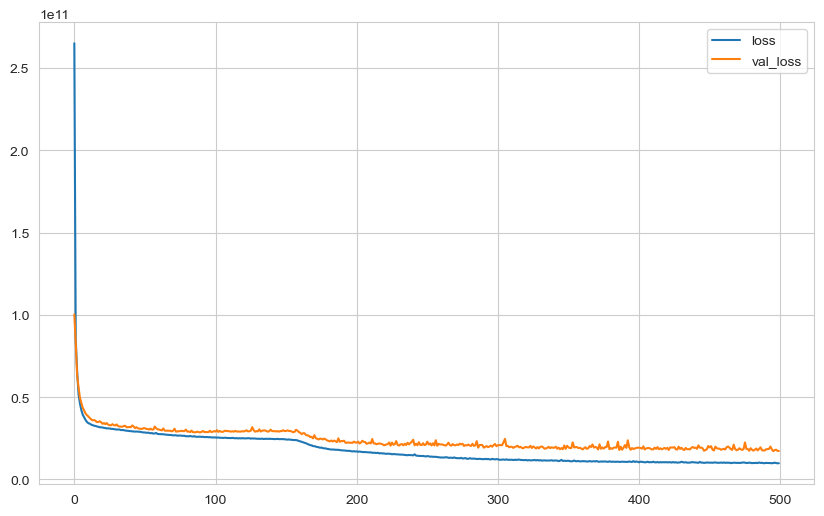

In [52]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [53]:
y_pred = model.predict(X_test)

68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [54]:
eval_metric(y_test, y_pred)

r2_score: 0.8942128708009471 
mae: 71327.15977647569 
mse: 13591505175.508326 
rmse: 116582.61094823843


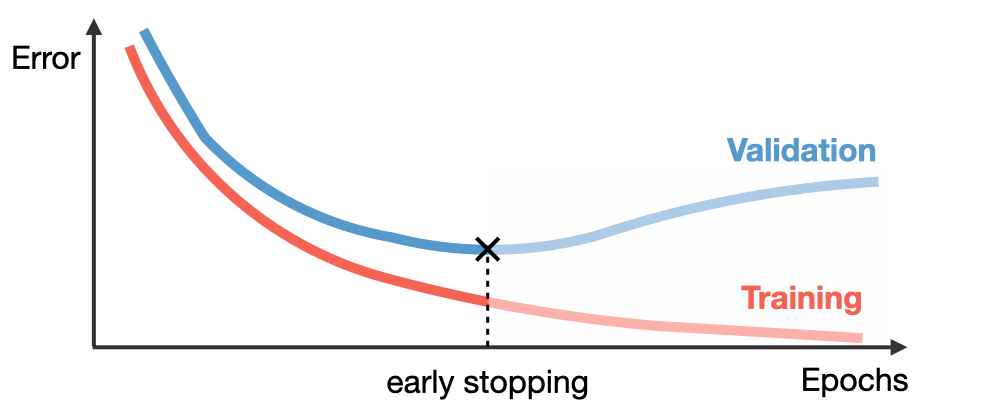

### EarlyStopping

**Early stopping** is a technique used in deep learning to prevent overfitting by halting the training process at an appropriate point, reducing the risk of the model overfitting to the training data.

Early stopping works by monitoring the **validation loss** during training. At the end of each epoch, the model's loss on the validation set is calculated. The technique tracks the lowest validation loss achieved before the model begins to overfit. Overfitting occurs when the model becomes too specialized to the training data, leading to a point where the **validation loss** starts increasing.

This point, often referred to as a "patience threshold," indicates that the model is no longer improving on unseen data. Early stopping stops the training process once it detects that the model's performance has stopped improving and assumes further training will lead to overfitting.

In addition to preventing overfitting, early stopping helps save time and computational resources. However, it must be applied carefully, as stopping too early may result in underfitting, where the model does not learn enough. Choosing the optimal number of epochs and configuring the patience parameter appropriately is essential for effective early stopping.

In [55]:
from tensorflow.keras.callbacks import EarlyStopping

In [56]:
model = Sequential()

model.add(Dense(32, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1))

opt = Adam(learning_rate = 0.003)
model.compile(optimizer = opt, loss = 'mse')

In [57]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 50)

In [58]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 64, epochs = 1000, callbacks = [early_stop])

Epoch 1/1000
259/259 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 346201948160.0000 - val_loss: 98550595584.0000
Epoch 2/1000
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 88653774848.0000 - val_loss: 77191520256.0000
Epoch 3/1000
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 70907904000.0000 - val_loss: 58824933376.0000
Epoch 4/1000
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 49724166144.0000 - val_loss: 51524612096.0000
Epoch 5/1000
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 49094553600.0000 - val_loss: 47276363776.0000
Epoch 6/1000
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 40798572544.0000 - val_loss: 43614146560.0000
Epoch 7/1000
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 36282679296.0000 - val_loss: 41535471616.0000
Epoch 8/1000
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 34884136960.0000 - val_loss: 39322718208.0000
Epoch 9/1000
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 35246657536.0000 - val_loss: 40210673664.0000
Epoch 10/1000
259/259 ━━━━━

259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22865227776.0000 - val_loss: 31205847040.0000
Epoch 116/1000
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23844513792.0000 - val_loss: 30493708288.0000
Epoch 117/1000
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24669964288.0000 - val_loss: 29330980864.0000
Epoch 118/1000
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23968548864.0000 - val_loss: 30732384256.0000
Epoch 119/1000
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 25418266624.0000 - val_loss: 31574093824.0000
Epoch 120/1000
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 25505445888.0000 - val_loss: 29897453568.0000
Epoch 121/1000
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23847598080.0000 - val_loss: 29939232768.0000
Epoch 122/1000
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24127088640.0000 - val_loss: 29874493440.0000
Epoch 123/1000
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23110535168.0000 - val_loss: 29928343552.0000
Epoch 124/1000
259/259 ━━

Our model stopped training before reaching 1000 epochs because;  
**the patience value of 50** indicates how long to wait without improvement in the monitored metric (in this case, val_loss, or validation loss) during training. That is, if there is no improvement in validation loss for a specified number of epochs (50 epochs), the training will stop.

<Axes: >

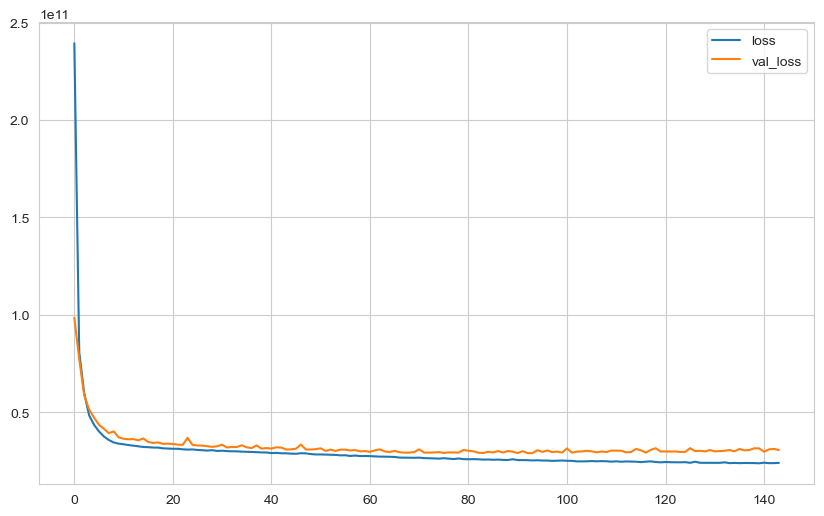

In [59]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [60]:
y_pred = model.predict(X_test)

68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [61]:
eval_metric(y_test, y_pred)       

r2_score: 0.8238254963654417 
mae: 94781.44544632523 
mse: 22634858286.362774 
rmse: 150448.85604870107


### Dropout

**Dropout** is a technique used in deep learning models to prevent overfitting. This technique is implemented by randomly disabling certain neurons during training.

Dropout involves shutting down the connections of each neuron with a specific probability at each training step. This results in using a different subset of input data, effectively creating a different model at each training step, which reduces the risk of the model becoming overly fitted.

The dropout technique helps the model generalize better by creating sparse features, as neurons do not have to share learned characteristics with other neurons. Additionally, dropout techniques can enhance the robustness of the model by reducing the effects of weighted and noisy data.

Dropout can provide an effective solution to the overfitting problem, which often arises from deep learning models having many parameters. However, the use of dropout adds some training time to the model and requires more training steps. Moreover, dropout can sometimes skip important features of neurons, potentially reducing the model's performance. Therefore, the dropout technique should be applied correctly, and an optimal probability value should be selected.

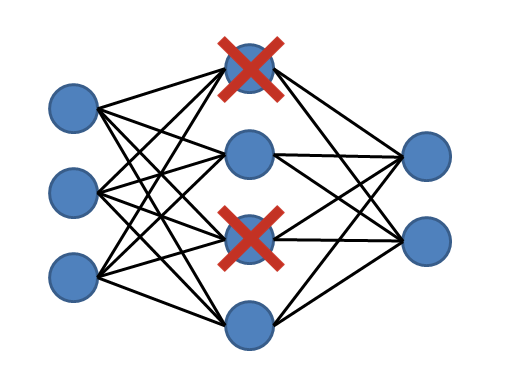

In [62]:
from tensorflow.keras.layers import Dropout

In [63]:
model = Sequential()

model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

opt = Adam(learning_rate = 0.003)
model.compile(optimizer = opt, loss = 'mse')

In [64]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 25)

In [65]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 128, epochs = 1000, callbacks = [early_stop])

Epoch 1/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 419249455104.0000 - val_loss: 107085922304.0000
Epoch 2/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 133523374080.0000 - val_loss: 99920715776.0000
Epoch 3/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 118377070592.0000 - val_loss: 89104670720.0000
Epoch 4/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 114322006016.0000 - val_loss: 75090501632.0000
Epoch 5/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 93460701184.0000 - val_loss: 64799154176.0000
Epoch 6/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 86229147648.0000 - val_loss: 56528384000.0000
Epoch 7/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 82331607040.0000 - val_loss: 53947617280.0000
Epoch 8/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 80365641728.0000 - val_loss: 52710191104.0000
Epoch 9/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 80573571072.0000 - val_loss: 48393641984.0000
Epoch 10/1000
130/130 ━

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 55718801408.0000 - val_loss: 31727663104.0000
Epoch 116/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 55400960000.0000 - val_loss: 30105044992.0000
Epoch 117/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 56568958976.0000 - val_loss: 32154503168.0000
Epoch 118/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 55860551680.0000 - val_loss: 31649556480.0000
Epoch 119/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 56579686400.0000 - val_loss: 30673108992.0000
Epoch 120/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 60860354560.0000 - val_loss: 30638786560.0000
Epoch 121/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 55418687488.0000 - val_loss: 30591062016.0000
Epoch 122/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 62237650944.0000 - val_loss: 30588790784.0000
Epoch 123/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 56540983296.0000 - val_loss: 30072557568.0000
Epoch 124/1000
130/130 ━━

<Axes: >

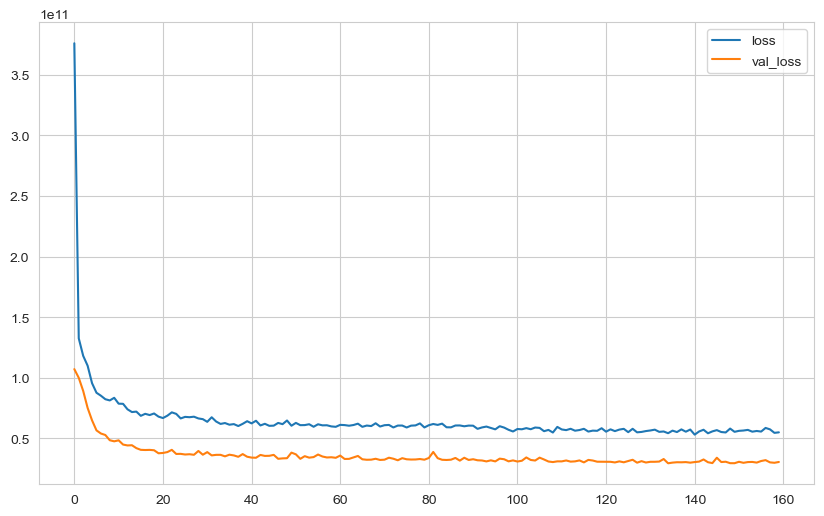

In [66]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [67]:
y_pred = model.predict(X_test)

68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


In [68]:
eval_metric(y_test, y_pred)

r2_score: 0.8025935774510374 
mae: 98962.68289930555 
mse: 25362730173.954193 
rmse: 159256.80573826097


## Saving Final Model and Scaler

In [69]:
from sklearn.preprocessing import MinMaxScaler
import pickle

scaler = MinMaxScaler().fit(X)
pickle.dump(scaler, open("scaler_kc_house", 'wb'))

In [70]:
X_scaled = scaler.transform(X)

In [71]:
model = Sequential()

model.add(Dense(32, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1))

opt = Adam(learning_rate = 0.003) # default learning rate value is 0.001
model.compile(optimizer = opt, loss = 'mse')

In [72]:
#early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 25)

In [73]:
model.fit(x=X_scaled,         
          y=y,             
          validation_split= 0.1,  
          batch_size=64,     
          epochs=500,         
          # callbacks=[early_stop]  
         )


Epoch 1/500
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 336864542720.0000 - val_loss: 95981780992.0000
Epoch 2/500
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 79591014400.0000 - val_loss: 64975200256.0000
Epoch 3/500
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - loss: 53628923904.0000 - val_loss: 50630373376.0000
Epoch 4/500
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 43402051584.0000 - val_loss: 46558310400.0000
Epoch 5/500
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 39994572800.0000 - val_loss: 44415877120.0000
Epoch 6/500
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 37809172480.0000 - val_loss: 47119978496.0000
Epoch 7/500
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - loss: 33537488896.0000 - val_loss: 42840367104.0000
Epoch 8/500
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 34079092736.0000 - val_loss: 42954342400.0000
Epoch 9/500
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 30962329600.0000 - val_loss: 42407350272.0000
Epoch 10/500
304/304 ━━━━━━━━━

304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - loss: 23307722752.0000 - val_loss: 31853563904.0000
Epoch 116/500
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22456774656.0000 - val_loss: 32916260864.0000
Epoch 117/500
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23122436096.0000 - val_loss: 32688472064.0000
Epoch 118/500
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22546839552.0000 - val_loss: 31883837440.0000
Epoch 119/500
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22279352320.0000 - val_loss: 32664547328.0000
Epoch 120/500
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22966671360.0000 - val_loss: 31647414272.0000
Epoch 121/500
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - loss: 21928099840.0000 - val_loss: 32640512000.0000
Epoch 122/500
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23598088192.0000 - val_loss: 32226740224.0000
Epoch 123/500
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22556100608.0000 - val_loss: 31677841408.0000
Epoch 124/500
304/304 ━━━━━━━

Epoch 229/500
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12559345664.0000 - val_loss: 22029545472.0000
Epoch 230/500
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - loss: 12481251328.0000 - val_loss: 23284867072.0000
Epoch 231/500
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12491601920.0000 - val_loss: 27910576128.0000
Epoch 232/500
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12795850752.0000 - val_loss: 21784041472.0000
Epoch 233/500
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12786563072.0000 - val_loss: 24348270592.0000
Epoch 234/500
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - loss: 12311325696.0000 - val_loss: 22055909376.0000
Epoch 235/500
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12743371776.0000 - val_loss: 24837109760.0000
Epoch 236/500
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12006163456.0000 - val_loss: 22969114624.0000
Epoch 237/500
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12519080960.0000 - val_loss: 21176772608.0000
Epoch 238/500
3

304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10562729984.0000 - val_loss: 21383467008.0000
Epoch 344/500
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - loss: 10271863808.0000 - val_loss: 21742821376.0000
Epoch 345/500
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - loss: 10274767872.0000 - val_loss: 22887634944.0000
Epoch 346/500
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10482357248.0000 - val_loss: 22584078336.0000
Epoch 347/500
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - loss: 11027722240.0000 - val_loss: 22769412096.0000
Epoch 348/500
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - loss: 10541193216.0000 - val_loss: 21399762944.0000
Epoch 349/500
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - loss: 10719388672.0000 - val_loss: 21658521600.0000
Epoch 350/500
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10419929088.0000 - val_loss: 21867671552.0000
Epoch 351/500
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - loss: 10398832640.0000 - val_loss: 22438029312.0000
Epoch 352/500
304/304

304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10443803648.0000 - val_loss: 21636212736.0000
Epoch 458/500
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9810323456.0000 - val_loss: 21066207232.0000
Epoch 459/500
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - loss: 9917503488.0000 - val_loss: 21221683200.0000
Epoch 460/500
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10240498688.0000 - val_loss: 21680971776.0000
Epoch 461/500
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - loss: 9943661568.0000 - val_loss: 21709279232.0000
Epoch 462/500
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - loss: 10042422272.0000 - val_loss: 21782063104.0000
Epoch 463/500
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - loss: 10010738688.0000 - val_loss: 20885620736.0000
Epoch 464/500
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - loss: 10419939328.0000 - val_loss: 20927102976.0000
Epoch 465/500
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - loss: 9420010496.0000 - val_loss: 21771763712.0000
Epoch 466/500
304/304 ━━━

<Axes: >

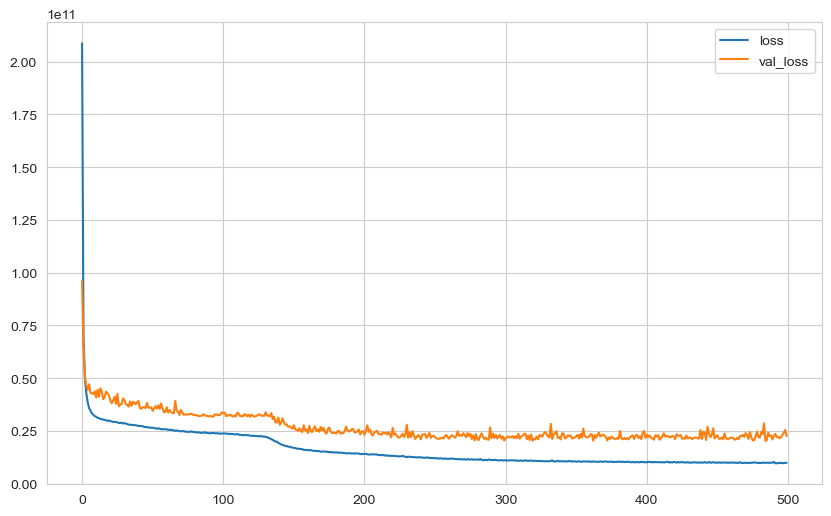

In [74]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [75]:
y_pred = model.predict(X_test)

68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [76]:
eval_metric(y_test, y_pred)

r2_score: 0.9341437354335331 
mae: 62763.82396918403 
mse: 8461197193.569305 
rmse: 91984.76609509482


In [77]:
from tensorflow.keras.saving import save_model

save_model(model, 'model_kc_house.keras')

## Loading Model and Scaler

In [78]:
from tensorflow.keras.models import load_model

In [79]:
model_kc_house = load_model('model_kc_house.keras')

In [80]:
scaler_kc_house = pickle.load(open("scaler_kc_house", "rb"))

## Prediction

In [81]:
single_house = df.drop('price', axis = 1).iloc[0:1, :]
single_house

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,47.511,-122.257,1340,5650,False,False,False,False,False,False,False,False,False,True,False,False


In [82]:
single_house = scaler_kc_house.transform(single_house)
single_house

array([[0.2       , 0.06666667, 0.06150342, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.08960177,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00574235, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ]])

In [83]:
model_kc_house.predict(single_house)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


array([[249530.94]], dtype=float32)

In [84]:
df.iloc[0][0]

221900.0

## Comparison with ML

### Linear Regression

In [85]:
from sklearn.linear_model import LinearRegression 

In [86]:
ln_model = LinearRegression()
ln_model.fit(X_train, y_train)
y_pred = ln_model.predict(X_test)
eval_metric(y_test, y_pred)

r2_score: 0.7167684354008907 
mae: 122246.33148148148 
mse: 36389523992.7787 
rmse: 190760.3837089313


### Random Forest

In [87]:
from sklearn.ensemble import RandomForestRegressor

In [88]:
rf_model = RandomForestRegressor(random_state = 101)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
eval_metric(y_test, y_pred)

r2_score: 0.8886293030442941 
mae: 64785.36375462963 
mse: 14308880631.643038 
rmse: 119619.73345415479


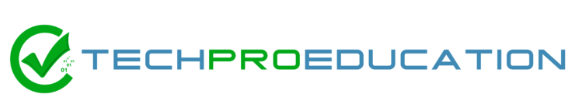